## Necessary Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#for visualization :
import matplotlib.pyplot as plt
import seaborn as sns
#To remove warnings:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.7.0


In [11]:
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

In [77]:
data = pd.read_excel('MP3.xlsx')
data.head()

Company   P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
1    Natl. Peroxide  9.59   32.45       0.00       2.91  20.91  21.29   
2               HEG  2.53   90.57       0.16       2.48  58.76  80.52   
3       CSL Finance  7.93   14.95       0.56       0.95   8.38  12.19   
4  Sandur Manganese  5.17   35.25       0.00       1.37  21.67  22.15   
5  Seshasayee Paper  7.01   23.03       0.21       1.71  14.28  18.60   

   EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold% U/O  
1        5.98         3.86        608.55       70.76   U  
2        1.69         1.22        160.62       61.04   U  
3        6.32         3.29          3.99       57.07   U  
4        3.03         1.11         46.92       72.45   U  
5        4.03         0.92         17.65       42.65   U

In [78]:
#  reset the index
data.reset_index(inplace=True,drop=True)    

In [79]:
#  show first five rows of data
data.head()    

Company   P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
0    Natl. Peroxide  9.59   32.45       0.00       2.91  20.91  21.29   
1               HEG  2.53   90.57       0.16       2.48  58.76  80.52   
2       CSL Finance  7.93   14.95       0.56       0.95   8.38  12.19   
3  Sandur Manganese  5.17   35.25       0.00       1.37  21.67  22.15   
4  Seshasayee Paper  7.01   23.03       0.21       1.71  14.28  18.60   

   EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold% U/O  
0        5.98         3.86        608.55       70.76   U  
1        1.69         1.22        160.62       61.04   U  
2        6.32         3.29          3.99       57.07   U  
3        3.03         1.11         46.92       72.45   U  
4        4.03         0.92         17.65       42.65   U

In [80]:
#  show last five rows of data
data.tail()    

Company    P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
551    Comfort Intech   1.23    6.66       0.02       0.21   4.59   4.66   
552  Expo Gas Contain  12.11   10.25       1.30       0.44   0.18   0.39   
553      Ritesh Intl.  11.11    3.30       0.22       0.40   0.66   0.90   
554  Guj. Terce Labs.  37.56    2.95       0.04       0.63   1.16   1.76   
555       H. S. India   8.57    8.66       0.71       0.48   3.92   7.08   

     EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold% U/O  
551      -38.33         0.43         -1.95       54.18   U  
552        5.20         0.16          1.38       67.41   O  
553      -20.75         0.11         -3.40       49.76   O  
554        9.26         0.19          2.05       35.23   O  
555        4.84         0.47          1.92       40.36   O

In [81]:
#data.drop_duplicates('Company',inplace=True)

In [82]:
data.loc[data['U/O']=='O ',['U/O']] = 'O'
data['U/O'].unique()

array(['U', 'O', nan], dtype=object)

In [83]:
#  show various statistical values for the data
data.describe()

P/E      ROCE %   Debt / Eq   CMP / BV        ROA %       ROE %  \
count  556.000000  555.000000  556.000000  556.000000  556.000000  556.000000   
mean    21.012122   23.210559    1.199029    3.730647   14.049694   19.594928   
std     30.283065   17.316696    4.174032    5.734288   12.304016   20.918754   
min      0.110000  -64.220000    0.000000    0.040000  -23.830000 -108.830000   
25%      7.037500   12.255000    0.000000    1.017500    5.322500   12.235000   
50%     12.370000   21.580000    0.185000    2.015000   12.845000   17.455000   
75%     23.405000   28.840000    0.740000    3.950000   19.000000   23.787500   
max    445.620000  108.620000   59.730000   56.170000   86.960000  273.040000   

        EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold%  
count   556.000000   554.000000    554.000000  556.000000  
mean     14.050755     3.135921    225.825632   55.793597  
std      81.417019     8.749168   1263.442720   17.570630  
min    -165.310000     0.020000   -202.000000    0.000000  
25%       4.435000     0.642500      3.110000   47.442500  
50%       7.645000     1.395000     12.345000   58.525000  
75%      14.062500     3.575000     56.155000   69.192500  
max    1902.000000   158.500000  18165.750000   97.460000

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 12 columns):
Company         556 non-null object
P/E             556 non-null float64
ROCE %          555 non-null float64
Debt / Eq       556 non-null float64
CMP / BV        556 non-null float64
ROA %           556 non-null float64
ROE %           556 non-null float64
EV/EBITDA       556 non-null float64
CMP / Sales     554 non-null float64
Int Coverage    554 non-null float64
Prom.Hold%      556 non-null float64
U/O             532 non-null object
dtypes: float64(10), object(2)
memory usage: 52.2+ KB


In [85]:
data.isna().sum()    #  Number of missing values in the data

Company          0
P/E              0
ROCE %           1
Debt / Eq        0
CMP / BV         0
ROA %            0
ROE %            0
EV/EBITDA        0
CMP / Sales      2
Int Coverage     2
Prom.Hold%       0
U/O             24
dtype: int64

In [86]:
data.count().iplot(kind='bar')

###### CHECK WHERE ARE THE NULL VALUES

In [87]:
data[data['ROCE %'].isna()]

Company    P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
72  Amrutanjan Health  58.82     NaN        0.0       7.18  14.68  15.39   

    EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold% U/O  
72        31.3         3.87         285.0       50.02   O

In [88]:
data[data['CMP / Sales'].isna()]

Company    P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
400  Balmer Law. Inv.  11.51    40.3        0.0       5.26  38.98  38.98   
465  Kkalpana Plastic   7.74     2.6        0.0       0.22   1.83   1.83   

     EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold% U/O  
400        9.76          NaN          9.09       59.67   O  
465       -0.78          NaN          0.40       72.48   O

In [89]:
data[data['Int Coverage'].isna()]

Company   P/E  ROCE %  Debt / Eq  CMP / BV   ROA %  ROE %  \
176  SagarSoft (India  6.27   61.97       0.01       3.12  41.47  43.23   
197     White Organic  5.24   33.71       0.01       1.54  23.57  25.36   

     EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold%  U/O  
176        3.84         1.22           NaN       52.26  NaN  
197        4.02         0.29           NaN       25.40    U

##### DROP NULL VALUES

In [90]:
data.drop([72,400,465,400,176,197],inplace=True)

In [91]:
data.reset_index(inplace=True,drop=True)    #reset the index after dropping rows

In [92]:
data.describe()

P/E      ROCE %   Debt / Eq   CMP / BV        ROA %       ROE %  \
count  551.000000  551.000000  551.000000  551.000000  551.000000  551.000000   
mean    21.040218   23.127550    1.209873    3.733067   13.958439   19.546261   
std     30.355713   17.257076    4.191400    5.755283   12.240205   20.957212   
min      0.110000  -64.220000    0.000000    0.040000  -23.830000 -108.830000   
25%      7.075000   12.255000    0.000000    1.015000    5.295000   12.220000   
50%     12.420000   21.460000    0.190000    2.010000   12.730000   17.430000   
75%     23.440000   28.725000    0.745000    3.930000   18.890000   23.660000   
max    445.620000  108.620000   59.730000   56.170000   86.960000  273.040000   

        EV/EBITDA   CMP / Sales  Int Coverage  Prom.Hold%  
count   551.000000   551.000000    551.000000  551.000000  
mean     14.090889     3.143230    226.520708   55.828330  
std      81.778015     8.771718   1266.810908   17.585107  
min    -165.310000     0.020000   -202.000000    0.000000  
25%       4.445000     0.645000      3.110000   47.385000  
50%       7.650000     1.400000     12.350000   58.550000  
75%      14.065000     3.560000     55.970000   69.195000  
max    1902.000000   158.500000  18165.750000   97.460000

In [93]:
U_O_missing = data[data['U/O'].isna()]

In [94]:
X = data.loc[data['U/O'].notna(),data.columns!='U/O']
y = data.loc[data['U/O'].notna(),'U/O']

In [95]:
#X = X.reset_index()

In [96]:
X.drop(['Company'],inplace=True,axis=1)

## Exploratory Data Analysis

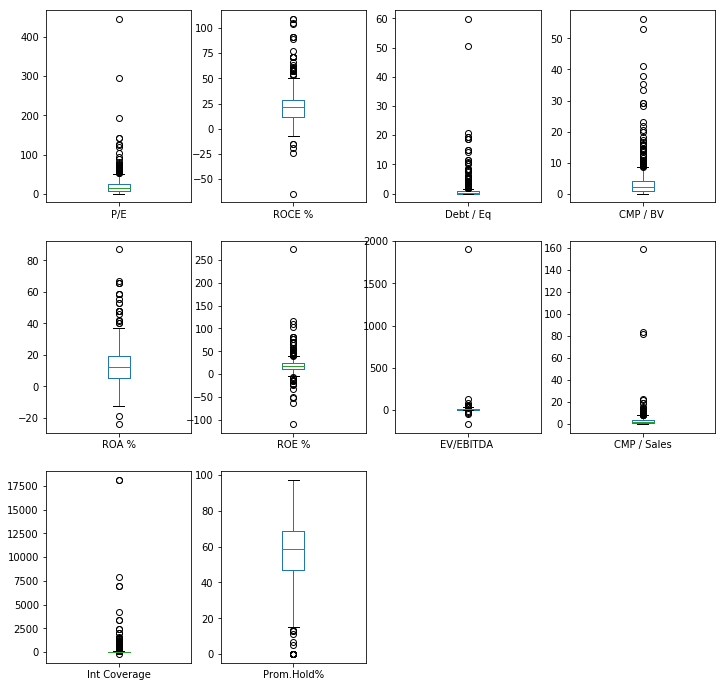

In [97]:
plt.figure(figsize=(12,12))
i = 1
for x in X.columns:
    plt.subplot(3,4,i)  # plt.subplot(nrows, ncols, plot_number)
    #plt.axis('off')
    X[x].plot.box()
    i = i+1

In [98]:
X.iplot(kind='bubble',x='P/E',y=X.columns[6],size='Int Coverage')

In [99]:
X['target'] = y.values

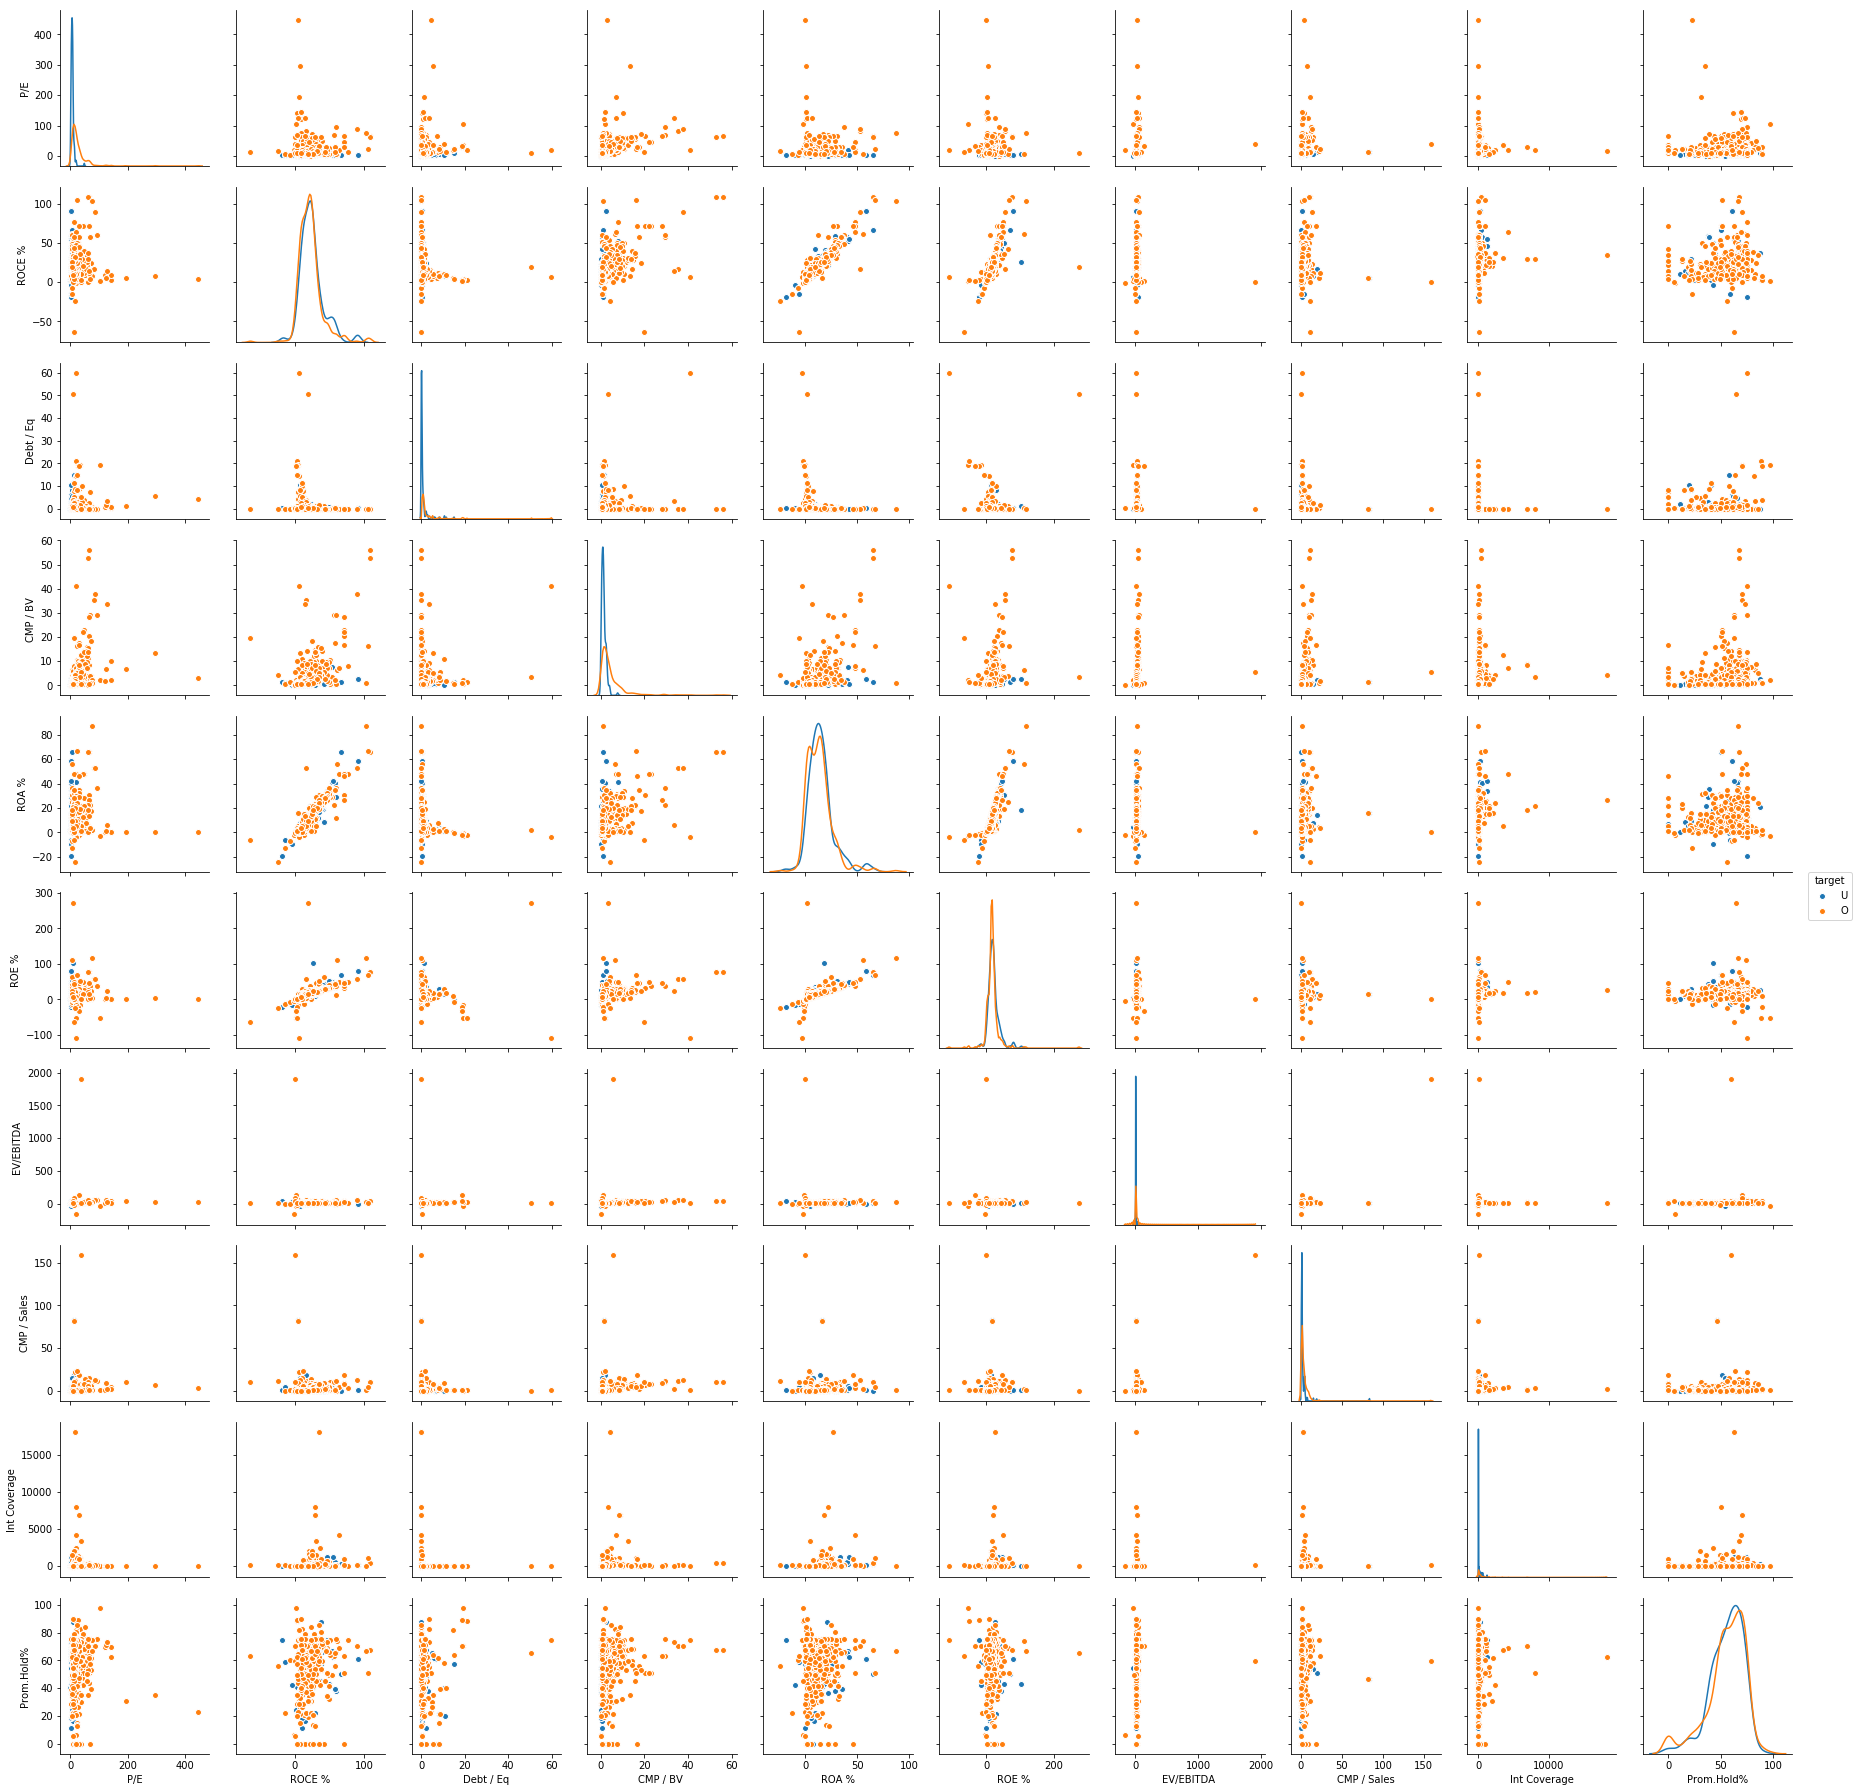

In [100]:
sns.pairplot(X,hue='target',diag_kind='kde')

##### Here we see that ROCE%,ROE% and Interest Coverage ratios do not have any contribution in distinguishing between the two target values U and O by seeing the bell curves.And we do not have any 2 columns that would clearly seperate the values into different portions.Therefore we should remove these 3 columns.

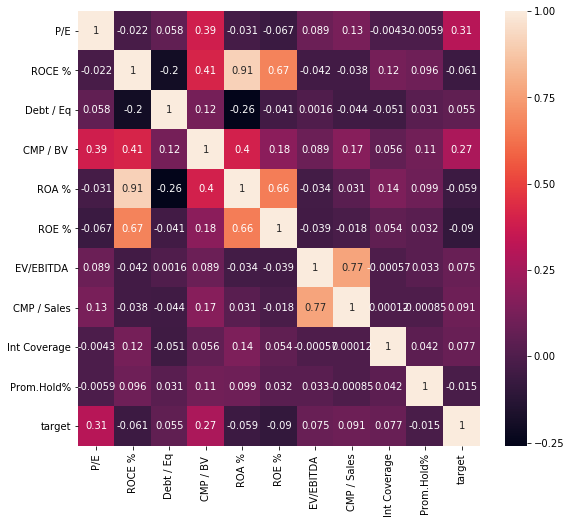

In [101]:
X.loc[X['target']=='O','target'] = 1

X.loc[X['target']=='U','target'] = 0

plt.figure(figsize=(9,8))
sns.heatmap(X.corr(),annot=True)

###### **ROA% and ROCE% are the most correlated

In [102]:
X.drop([X.columns[8]],axis=1,inplace=True)

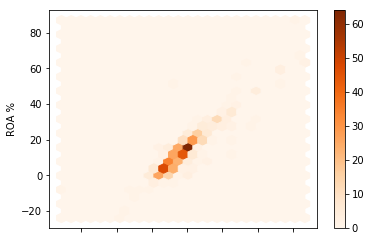

In [103]:
'''Hexagonal Bin Plot
Useful for Bivariate Data, alternative to scatterplot:
'''
X.plot.hexbin(x=X.columns[1],y=X.columns[4],gridsize=25,cmap='Oranges')

In [104]:
X['target'].value_counts().iplot(kind='bar')

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [106]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
Xtrain,Xtest,ytrain,ytest = train_test_split(X.drop('target',axis=1),y)
for i in (Xtrain,Xtest,ytrain,ytest):
    print(i.shape)

(396, 9)
(132, 9)
(396,)
(132,)


## Decision Tree

In [107]:
# Reference for Decision Tree and Random Forest Classification(CART-Classification and Regression trees):
# https://www.stat.wisc.edu/~loh/treeprogs/guide/wires11.pdf
# Gini impurity:
# https://en.wikipedia.org/wiki/Decision_tree_learning

In [112]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
best_x = 0
kf = KFold(n_splits=4)
depth = []
for x in range(1,200):
    dtc = DecisionTreeClassifier(max_depth=x)
    dtc.fit(Xtrain,ytrain)
    Y_pred_rf = dtc.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print("Max Accuracy:\t",max_accuracy)
print("Best Depth:\t",best_x)

Max Accuracy:	 84.09
Best Depth:	 3


In [113]:
dtc = DecisionTreeClassifier(max_depth=best_x)
dtc.fit(Xtrain,ytrain)
Y_pred_rf = dtc.predict(Xtest)

In [115]:
print(Y_pred_rf.shape)
score_rf = round(accuracy_score(Y_pred_rf,ytest)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

(132,)
The accuracy score achieved using Decision Tree is: 84.09 %


In [116]:
confusion_matrix(ytest,Y_pred_rf)

array([[85,  6],
       [15, 26]], dtype=int64)

In [117]:
print(classification_report(ytest,Y_pred_rf))

              precision    recall  f1-score   support

           O       0.85      0.93      0.89        91
           U       0.81      0.63      0.71        41

   micro avg       0.84      0.84      0.84       132
   macro avg       0.83      0.78      0.80       132
weighted avg       0.84      0.84      0.83       132



In [118]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[:-1])
features

['P/E',
 'ROCE %',
 'Debt / Eq',
 'CMP / BV\xa0',
 'ROA\xa0%',
 'ROE %',
 'EV/EBITDA\xa0',
 'CMP / Sales',
 'Prom.Hold%']

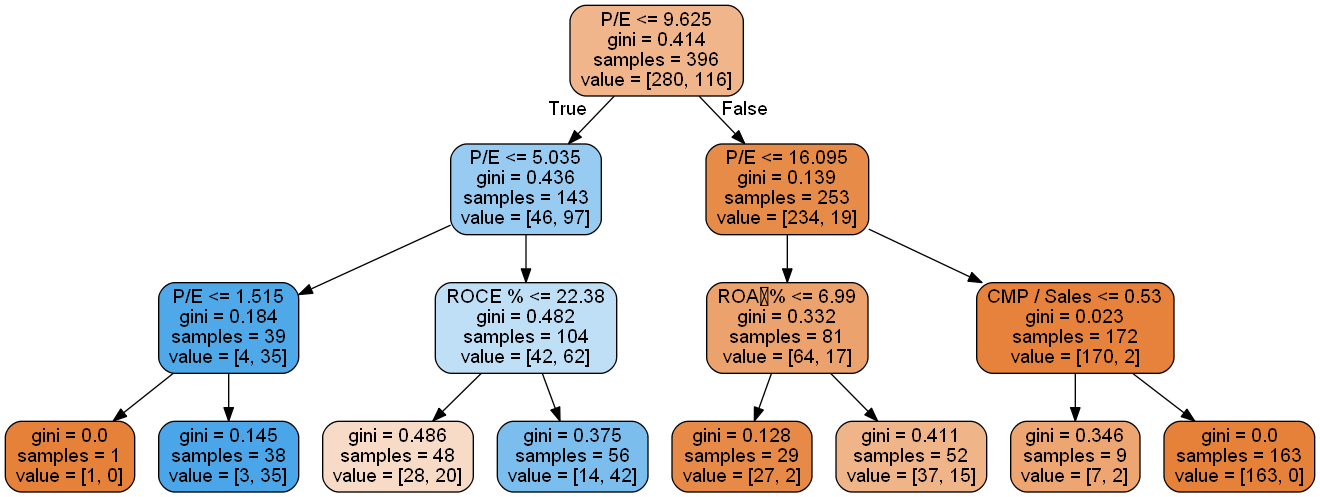

In [119]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [120]:
confusion_matrix(ytrain,dtc.predict(Xtrain))

array([[263,  17],
       [ 39,  77]], dtype=int64)

In [121]:
# The model is undoubtedly overfitting on the data

### ADABoost Classifier

In [122]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtc,n_estimators=500, learning_rate=0.1, random_state=1)
ada.fit(Xtrain,ytrain)
y_test_pred = ada.predict(Xtest)
confusion_matrix(ytest,y_test_pred)

array([[75, 16],
       [ 6, 35]], dtype=int64)

## Random Forest Classifier:

In [123]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1,50):
    rf = RandomForestClassifier(n_estimators=x)
    rf.fit(Xtrain,ytrain)
    Y_pred_rf = rf.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(n_estimators=best_x)
rf.fit(Xtrain,ytrain)
Y_pred_rf = rf.predict(Xtest)

In [124]:
Y_pred_rf.shape
score_rf = round(accuracy_score(Y_pred_rf,ytest)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 80.3 %


In [125]:
best_x

3

In [126]:
confusion_matrix(ytest,Y_pred_rf)

array([[76, 15],
       [11, 30]], dtype=int64)

# K Nearest Neighbours:

In [127]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [128]:
scaled_features = scaler.transform(X.drop('target',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=X.columns[:-1])
df_feat.head()

P/E    ROCE %  Debt / Eq  CMP / BV      ROA %     ROE %  EV/EBITDA   \
0 -0.390604  0.546338  -0.284372  -0.152223  0.573977  0.111336   -0.101885   
1 -0.619520  3.894525  -0.246870  -0.225654  3.665789  3.018883   -0.153298   
2 -0.444428 -0.461805  -0.153115  -0.486929 -0.449548 -0.335375   -0.097811   
3 -0.533919  0.707641  -0.284372  -0.415207  0.636058  0.153552   -0.137239   
4 -0.474259  0.003669  -0.235151  -0.357145  0.032399 -0.020714   -0.125255   

   CMP / Sales  Prom.Hold%  
0     0.068393    0.858735  
1    -0.227024    0.309726  
2     0.004610    0.085492  
3    -0.239333    0.954190  
4    -0.260594   -0.728984

In [135]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,pred))

print("\nClassification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[79 12]
 [22 19]]

Classification Report:
               precision    recall  f1-score   support

           O       0.78      0.87      0.82        91
           U       0.61      0.46      0.53        41

   micro avg       0.74      0.74      0.74       132
   macro avg       0.70      0.67      0.68       132
weighted avg       0.73      0.74      0.73       132



In [130]:
confusion_matrix(y_train,knn.predict(X_train))

array([[262,  20],
       [ 63,  51]], dtype=int64)

In [133]:
error_rate = []

# Will take some time
for i in range(8,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

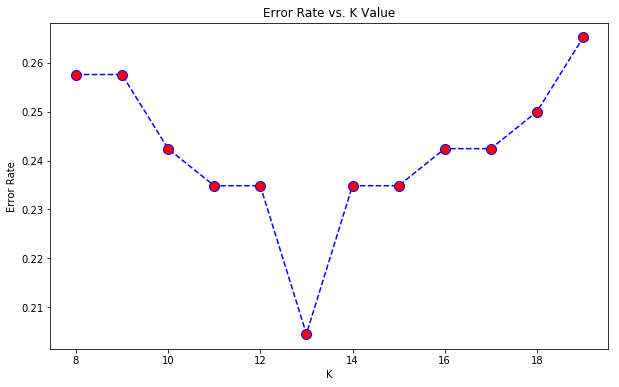

In [134]:
plt.figure(figsize=(10,6))
plt.plot(range(8,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# SVM with GridSearch

In [136]:
from sklearn.svm import SVC
model = SVC()
model.fit(Xtrain,ytrain)

predictions = model.predict(Xtest)
print(confusion_matrix(ytest,predictions))

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(Xtrain,ytrain)

print("Best Grid Parameters:\n",grid.best_params_)

print("Best Esitmator\n",grid.best_estimator_)

grid_predictions = grid.predict(Xtest)

print(confusion_matrix(ytest,grid_predictions))

[[88  3]
 [31 10]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.706766917293233, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7045454545454546, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7099236641221374, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.706766917293233, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7045454545454546, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7099236641221374, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7045454545454546, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7099236641221374, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.706766917293233, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7045454545454546, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7099236641221374, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.7196969696969697, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........

[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.8015267175572519, total=   0.0s
Best Grid Parameters:
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Esitmator
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[74 17]
 [11 30]]


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


# Principal Component Analysis

In [137]:
from sklearn.decomposition import PCA

In [138]:
pca = PCA(2)

In [139]:
scaled_features.shape

(528, 9)

In [140]:
pca_scaled = pca.fit_transform(scaled_features)

In [141]:
pca_scaled = pd.DataFrame(pca_scaled,columns=['Component 1','Component 2'])
pca_scaled['target'] = y.values
pca_scaled.head()

Component 1  Component 2 target
0     0.748042    -0.223395      U
1     5.692369    -1.169142      U
2    -0.817180    -0.239789      U
3     0.807192    -0.569547      U
4    -0.157657    -0.521715      U

#### PCA Graph with 2 components

(-2, 4)

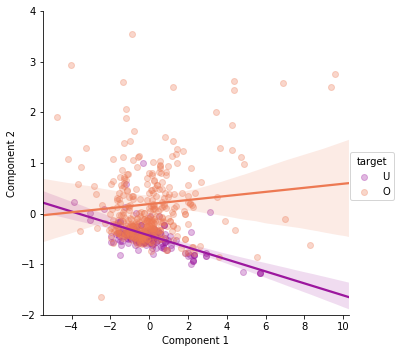

In [142]:
lm = sns.lmplot(x='Component 1',y='Component 2',data=pca_scaled,hue='target',palette='plasma',scatter_kws={'alpha':0.3})
axes = lm.axes
axes[0,0].set_ylim(-2,4)

In [143]:
pca = PCA(3)

In [144]:
pca_scaled = pca.fit_transform(scaled_features)

In [145]:
pca_scaled = pd.DataFrame(pca_scaled,columns=['C 1','C 2','C 3'])
pca_scaled['target'] = y.values
pca_scaled.head()

C 1       C 2       C 3 target
0  0.748042 -0.223395 -0.393589      U
1  5.692369 -1.169142 -1.240790      U
2 -0.817180 -0.239789 -0.445472      U
3  0.807192 -0.569547 -0.524787      U
4 -0.157657 -0.521715 -0.565321      U

#### PCA Graph with 3 components

In [146]:
pca_scaled.loc[:,['C 1','C 2','C 3']].iplot(kind='surface',colorscale='rdylbu')

### XGBoost Classifier

In [147]:
import xgboost
max_accuracy = 0
best_x = 0
for x in [0.1,0.01,1,10,100]:
    classifier = xgboost.XGBClassifier(max_depth=3,learning_rate=x)
    classifier.fit(Xtrain,ytrain)
    Y_pred_rf = classifier.predict(Xtest)
    current_accuracy = round(accuracy_score(Y_pred_rf,ytest)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

classifier = xgboost.XGBClassifier(max_depth=3,learning_rate=best_x)
classifier.fit(Xtrain,ytrain)
Y_pred_rf = classifier.predict(Xtest)

In [148]:
confusion_matrix(ytest,Y_pred_rf)

array([[80, 11],
       [ 6, 35]], dtype=int64)

In [150]:
print(classification_report(ytest,Y_pred_rf))

              precision    recall  f1-score   support

           O       0.93      0.88      0.90        91
           U       0.76      0.85      0.80        41

   micro avg       0.87      0.87      0.87       132
   macro avg       0.85      0.87      0.85       132
weighted avg       0.88      0.87      0.87       132

